In [128]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', sep=';', decimal=',')

x = df['xi'].to_numpy()
y = df['yi'].to_numpy()
z = df['zi'].to_numpy()


In [129]:
# Z = b1 + b2*x + b3*y + b4*x^2 + b5*y^2 + b6*x*y
F = np.column_stack((x,y, x**2, y**2, x*y))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.5563083256182995


In [130]:
# Z = b1 + b2*x + b3*y + b4*x^2 + b5*y^2
F = np.column_stack((x,y, x**2, y**2))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.5251435209476147


In [131]:
# Z = b1 + b2*x + b3*y + b4*x^2
F = np.column_stack((x,y, x**2))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.40515116900609394


In [132]:
# Z = b1 + b2*x + b3*y + b4*x^2
F = np.column_stack((x,y, x**2))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.40515116900609394


In [133]:
# Z = b1 + b2*x + b3*y
F = np.column_stack((x,y))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.398481438622576


In [134]:
# Z = b1 + b2*x 
F = x.reshape((-1, 1))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.06808731145563374


In [135]:
# Z = b1
F = np.ones(len(x)).reshape((-1, 1))

model = sm.OLS(z, F).fit()
print(model.rsquared)

-2.220446049250313e-16


Nejvyšší koeficitent determinace R^2 u modelu b1 + b2*x + b3*y + b4*x^2 + b5*y^2 + b6*x*y

In [136]:
# Výsledný model se kterým budeme pracovat
F = np.column_stack((x,y, x**2, y**2, x*y))
F = sm.add_constant(F)

model = sm.OLS(z, F).fit()
print(model.rsquared)

0.5563083256182995


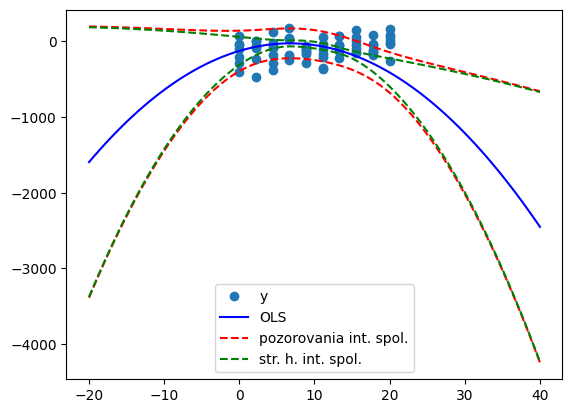

In [137]:
xx = np.linspace(np.min(x)-20, np.max(x) + 20, 100)
yy = np.linspace(np.min(y)-20, np.max(y) + 20, 100)
predict_values = np.column_stack((xx,yy, xx**2, yy**2, xx*yy))
predict_values = sm.add_constant(predict_values)

dt = model.get_prediction(predict_values).summary_frame(alpha = 0.05)
y_prediction = dt['mean']
obs_ci_lower = dt['obs_ci_lower']
obs_ci_upper = dt['obs_ci_upper']
mean_ci_lower = dt['mean_ci_lower']
mean_ci_upper = dt['mean_ci_upper']

plt.figure()

plt.plot(x, z, "o", label="y")
plt.plot(xx, y_prediction, "b", label="OLS")
plt.plot(xx, obs_ci_upper, "r--", label= "pozorovania int. spol.")
plt.plot(xx, mean_ci_upper, "g--", label= "str. h. int. spol.")
plt.plot(xx, obs_ci_lower, "r--")
plt.plot(xx, mean_ci_lower, "g--")
plt.legend(loc="best")